In [28]:
import matplotlib.pyplot as plt
import csv
import datetime
import matplotlib.dates as mdates
import os
import numpy as np

In [11]:
# List of csv files directories
# folder path
dir_path = r'C:\Users\terry\OneDrive\文档\GitHub\colab-wbur\fall_2022\data\debt_collector_query_result'

# list to store files
csv_dirs = []

# Iterate directory
for path in os.listdir(dir_path):
    # check if current path is a file
    if os.path.isfile(os.path.join(dir_path, path)):
        csv_dirs.append(path)

print(csv_dirs[:10])


# ['post_id', 'party_name', 'case_number', 'case_type', 'case_status', 'file_date', 'status_date']

['21st_Mortgage_Corporatio.csv', 'A.R.C._Accounts_Recovery.csv', 'A.R.M._Solutions.csv', 'Ability_Recovery_Services.csv', 'Accenture_Solutions_Private_Limited.csv', 'Accounts_Receivable_Automated_Solutions.csv', 'Accounts_Receivable_Technologies.csv', 'Account_Control_Technology.csv', 'Account_Discovery_Systems.csv', 'Account_Resolution_Group.csv']


In [15]:
def analyze_company(filepath):
    total_count = 0
    case_type = {}
    case_status = {}
    
    date_filed = {}
    #for i in range(1990, 2025):
    #    date_filed[i] = 0
    
    with open(filepath, "r") as f:
        reader = csv.reader(f)
        header = next(reader)

        if header == [""]:
            return [total_count, case_type, case_status, date_filed]
        
        for entry in reader:
            total_count += 1
            
            #update case type
            if entry[4] in case_type:
                case_type[entry[4]] += 1
            else:
                case_type[entry[4]] = 1
            
            #update case status
            if entry[5] in case_status:
                case_status[entry[5]] += 1
            else:
                case_status[entry[5]] = 1
                
            #update date
            if int(entry[6][:4]) in date_filed:
                date_filed[int(entry[6][:4])] += 1
            else:
                date_filed[int(entry[6][:4])] = 1
                
        
    
    return [total_count, case_type, case_status, date_filed]

In [17]:
def plot_dict_bar(d, label, filepath):
    #d = sorted(d, key=lambda a: d[a])
    #print(d)
    
    labels = []
    sizes = []
    
    for x, y in d.items():
        labels.append(x)
        sizes.append(y)
    
    # Plot
    plt.bar(labels, sizes)
    plt.xticks(rotation=90)
    plt.show()

In [18]:
def plot_dict_pie(d, label, filepath):
    #d = sorted(d, key=lambda a: d[a])
    #print(d)
    
    labels = []
    sizes = []
    
    for x, y in d.items():
        labels.append(x)
        sizes.append(y)
        
    labels = [f'{l}, {s:0.1f}' for l, s in zip(labels, sizes)]
    
    # Plot
    plt.pie(x=sizes)
    plt.legend(labels, loc=5)
    plt.show()

21st_Mortgage_Corporatio.csv


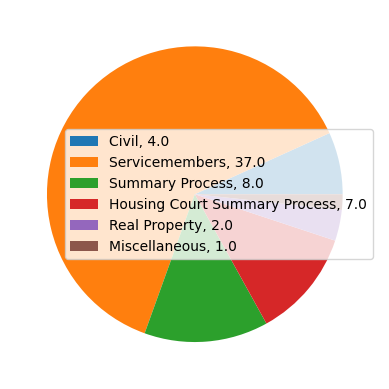

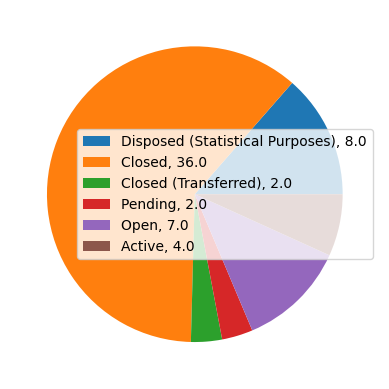

In [19]:
print(csv_dirs[0])

[total_count, case_type, case_status, _] = analyze_company(os.path.join(dir_path, csv_dirs[0]))

plot_dict_pie(case_type)
plot_dict_pie(case_status)

In [21]:
all_info = {}
for path in csv_dirs:
    all_info[path] = analyze_company(os.path.join(dir_path, path))
    

In [34]:
# Total cases for each company
case_count = [(bank_name, all_info[bank_name][0]) for bank_name in all_info.keys()]

with open(r'C:\Users\terry\OneDrive\文档\GitHub\colab-wbur\fall_2022\data\debt_collector_analyze_data\case_count.csv', 'w') as file:
    csv_writer = csv.writer(file,delimiter=',', lineterminator='\n')
    csv_writer.writerow(["company_name", "num_cases"])
    for company in case_count:
        csv_writer.writerow(company)

case_count[:10]

[('21st_Mortgage_Corporatio.csv', 59),
 ('A.R.C._Accounts_Recovery.csv', 0),
 ('A.R.M._Solutions.csv', 0),
 ('Ability_Recovery_Services.csv', 0),
 ('Accenture_Solutions_Private_Limited.csv', 0),
 ('Accounts_Receivable_Automated_Solutions.csv', 0),
 ('Accounts_Receivable_Technologies.csv', 0),
 ('Account_Control_Technology.csv', 0),
 ('Account_Discovery_Systems.csv', 0),
 ('Account_Resolution_Group.csv', 0)]

Bank name: ./bank_as_plantiff/td_bank.csv
Total case count: 10082


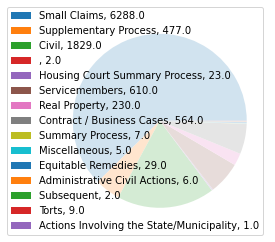

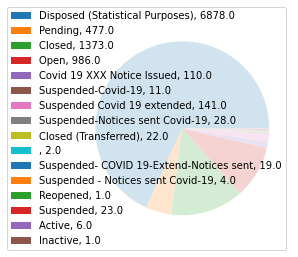

In [9]:
###### Analyze each bank info
path =r'C:\Users\terry\OneDrive\文档\GitHub\colab-wbur\fall_2022\data\debt_collector_analyze_data'

for company_name in csv_dirs:
    print(f"Bank name: {company_name}")
    company_path = os.path.join(dir_path, company_path)

    print(f"Total case count: {all_info[company_name][0]}")
    plot_dict_pie(all_info[path][1])
    plot_dict_pie(all_info[path][2])

In [10]:
# Date of case filed
path ='./bank_as_plantiff/chase_bank.csv'
print(f"Bank name: {path}")
print(all_info[path][3])

with open('bank_date.csv', mode='w') as csv_file:
    fieldnames = ["company_name", -111] + [i for i in range(2000, 2024)]
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)

    writer.writeheader()
    for key in all_info.keys():
        writer.writerow({**{'company_name': key}, **all_info[key][3]})

Bank name: ./bank_as_plantiff/chase_bank.csv
{2010: 6233, 2011: 2051, 2009: 4689, 2014: 1270, 2012: 2959, 2007: 2390, 2008: 2201, 2006: 818, 2005: 396, 2013: 1501, 2015: 720, 2016: 448, 2018: 164, 2017: 232, 2003: 3, 2021: 669, 2022: 92, 2020: 91, 2019: 98}


In [11]:
# Case status
path ='./bank_as_plantiff/chase_bank.csv'
print(f"Bank name: {path}")
print(all_info[path][2])

with open('bank_case_status.csv', mode='w') as csv_file:
    fieldnames = ["company_name", 
                  "Disposed (Statistical Purposes)", 'Closed', 'Pending', 
                  'Closed (Transferred)', 'Open', 'Suspended', 'Active', 
                  'Covid 19 XXX Notice Issued', 'Reopened', 'Inactive', 
                  'Suspended Covid 19 extended', 'Suspended- COVID 19-Extend-Notices sent', 
                  'Suspended-Covid-19', 'Suspended-Notices sent Covid-19', 
                  'Suspended COVID19 - TBD', 'Suspended - Notices sent Covid-19', '']
    writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
    writer.writeheader()
    for key in all_info.keys():
        writer.writerow({**{'company_name': key}, **all_info[key][2]})
    

Bank name: ./bank_as_plantiff/chase_bank.csv
{'Disposed (Statistical Purposes)': 16273, 'Closed': 8842, 'Pending': 277, 'Closed (Transferred)': 35, 'Open': 1428, 'Suspended': 14, 'Active': 144, 'Covid 19 XXX Notice Issued': 7, 'Reopened': 3, 'Inactive': 1, 'Suspended Covid 19 extended': 1}


In [36]:
# Case duration if the case is closed (or disposed)
def analyze_duration(filepath):
    total_count = 0
    average_duration = 0
    durations = []
    
    with open(filepath, "r") as f:
        reader = csv.reader(f)
        header = next(reader)
        
        for entry in reader:
            if entry[4] in ["Disposed (Statistical Purposes)", 'Closed']:
                total_count += 1
                start_date = datetime.datetime(int(entry[5][:4]), int(entry[5][4:6]), int(entry[5][6:]))
                end_date = datetime.datetime(int(entry[6][:4]), int(entry[6][4:6]), int(entry[6][6:]))
                
                diff_date = end_date - start_date
                
                durations += [diff_date]
                
    average_duration = sum(durations, datetime.timedelta(0)) / len(durations)
    print(average_duration)
    
    return durations

253 days, 0:30:01.762977
107 days, 15:30:17.408124
243 days, 13:04:38.797531
278 days, 19:38:35.923567
94 days, 10:57:06.737968
739 days, 23:04:36.923077
156 days, 3:05:16.930023
189 days, 15:38:12.358804
198 days, 1:14:27.512195
154 days, 20:37:33.108714


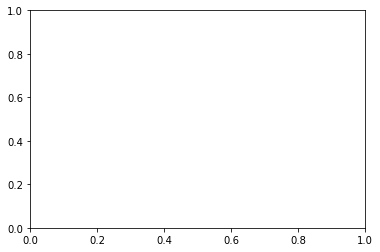

In [49]:
for path in csv_dirs:
    #print(path)
    n_bins = 30
    durations = analyze_duration(path)
    durations = [t.days for t in durations]
    fig= plt.hist(durations,  bins=n_bins)
    plt.xlabel('Case Durations (days)')
    plt.ylabel('Number of cases')
    plt.savefig(path + '.png')
    plt.cla()


In [55]:
# More accurate case date
def analyze_starting_date(filepath):
    total_count = 0
    start_dates = []
    
    with open(filepath, "r") as f:
        reader = csv.reader(f)
        header = next(reader)
        
        for entry in reader:
            try:
                start_date = datetime.datetime(int(entry[5][:4]), int(entry[5][4:6]), int(entry[5][6:]))
            except:
                continue
            total_count += 1
            start_dates += [start_date]
                
    return start_dates

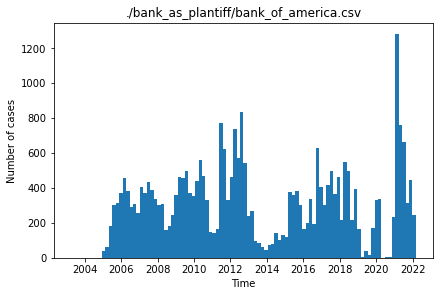

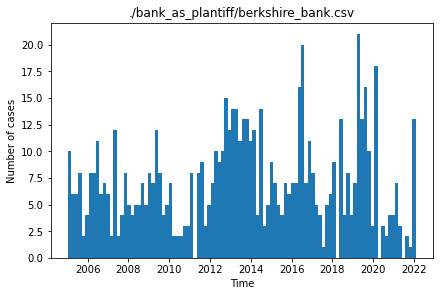

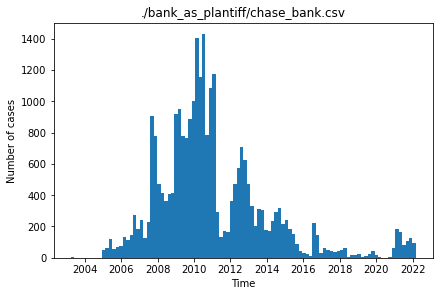

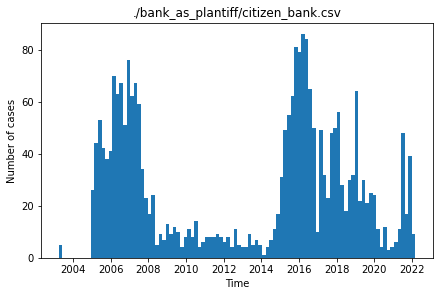

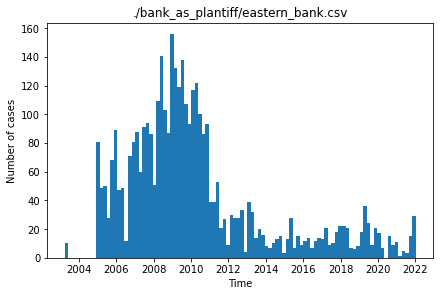

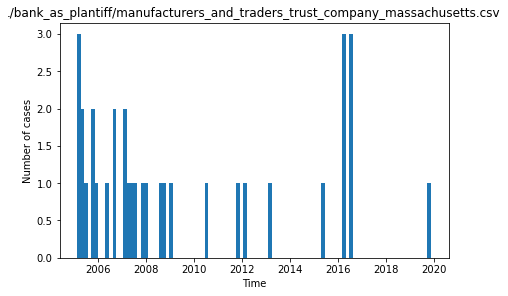

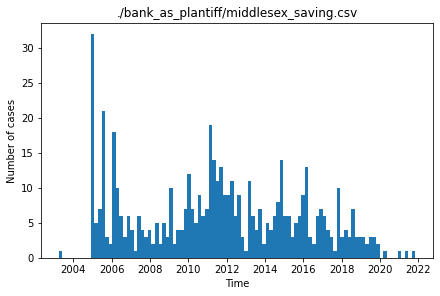

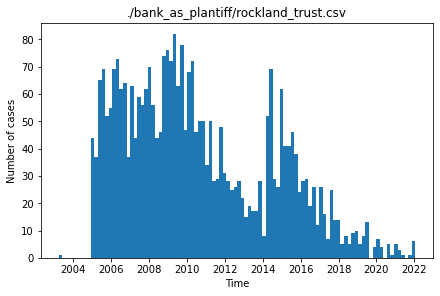

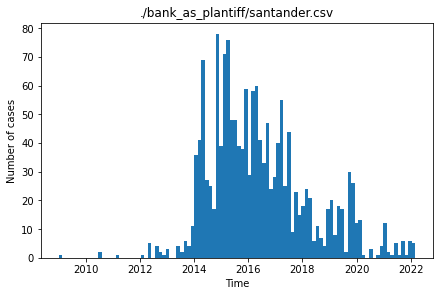

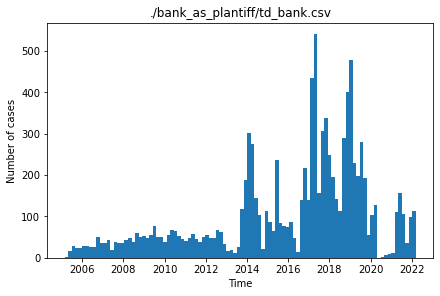

In [60]:
for path in csv_dirs:
    start_dates = analyze_starting_date(path)
    
    base = datetime.datetime(2005, 2, 1)
    n_bins = 100
    dates = start_dates
    N = len(dates)
    
    fig, ax = plt.subplots(constrained_layout=True)
    locator = mdates.AutoDateLocator()
    formatter = mdates.ConciseDateFormatter(locator)
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    
    ax.hist(dates, bins=n_bins)
    ax.set_title(path)
    
    plt.xlabel('Time')
    plt.ylabel('Number of cases')
    
    plt.savefig(path + '.png')